In [1]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

bbc = pd.read_csv('bbc.csv')
bbc.head()
print(bbc.shape)
print(bbc.info())
print(bbc.head())   

(2225, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   topic   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
None
                                                text     topic
0  Dallaglio his own man to the end\r\n\r\nContro...     sport
1  Best person' for top legal job\r\n\r\nThe "bes...  politics
2  Viewers to be able to shape TV\r\n\r\nImagine ...      tech
3  Fox attacks Blair's Tory 'lies'\r\n\r\nTony Bl...  politics
4  Microsoft debuts security tools\r\n\r\nMicroso...      tech


In [2]:
# Check for missing data and print the total number of missing values for each column
print("Missing data:", bbc.isnull().sum())

# Check for duplicate rows in the dataset and print the total number of duplicate rows
print("Duplicate data:", bbc.duplicated().sum())

# Display the unique values of the 'topic' column to examine the different categories
print("Unique values in the 'topic' column:", bbc['topic'].unique())

Missing data: text     0
topic    0
dtype: int64
Duplicate data: 98
Unique values in the 'topic' column: ['sport' 'politics' 'tech' 'business' 'entertainment']


In [3]:
# Display summary statistics of the cleaned dataset
bbc.describe()
print(bbc.head())


                                                text     topic
0  Dallaglio his own man to the end\r\n\r\nContro...     sport
1  Best person' for top legal job\r\n\r\nThe "bes...  politics
2  Viewers to be able to shape TV\r\n\r\nImagine ...      tech
3  Fox attacks Blair's Tory 'lies'\r\n\r\nTony Bl...  politics
4  Microsoft debuts security tools\r\n\r\nMicroso...      tech


In [4]:
bbc["text"] = bbc["text"].str.lower()
print(bbc.head())

                                                text     topic
0  dallaglio his own man to the end\r\n\r\ncontro...     sport
1  best person' for top legal job\r\n\r\nthe "bes...  politics
2  viewers to be able to shape tv\r\n\r\nimagine ...      tech
3  fox attacks blair's tory 'lies'\r\n\r\ntony bl...  politics
4  microsoft debuts security tools\r\n\r\nmicroso...      tech


In [5]:
bbc.loc[:, "text"] = bbc["text"].str.replace("'s", "", regex=True)
bbc

,text,topic
0,dallaglio his own man to the end\r\n\r\ncontro...,sport
1,"best person' for top legal job\r\n\r\nthe ""bes...",politics
2,viewers to be able to shape tv\r\n\r\nimagine ...,tech
3,fox attacks blair tory 'lies'\r\n\r\ntony blai...,politics
4,microsoft debuts security tools\r\n\r\nmicroso...,tech
...,...,...
2220,michael film signals 'retirement'\r\n\r\nsinge...,entertainment
2221,ray charles studio becomes museum\r\n\r\na mus...,entertainment
2222,chancellor rallies labour voters\r\n\r\ngordon...,politics
2223,oscar nominees gear up for lunch\r\n\r\nleonar...,entertainment


In [6]:
# Loại bỏ dấu câu và ký tự đặc biệt
# Loại bỏ các ký tự đặc biệt trong cột 'text'
bbc["text"] = bbc["text"].str.replace(r"[;!?,.()\"']", "", regex=True)
bbc

,text,topic
0,dallaglio his own man to the end\r\n\r\ncontro...,sport
1,best person for top legal job\r\n\r\nthe best ...,politics
2,viewers to be able to shape tv\r\n\r\nimagine ...,tech
3,fox attacks blair tory lies\r\n\r\ntony blair ...,politics
4,microsoft debuts security tools\r\n\r\nmicroso...,tech
...,...,...
2220,michael film signals retirement\r\n\r\nsinger ...,entertainment
2221,ray charles studio becomes museum\r\n\r\na mus...,entertainment
2222,chancellor rallies labour voters\r\n\r\ngordon...,politics
2223,oscar nominees gear up for lunch\r\n\r\nleonar...,entertainment


In [7]:
# Create set of stop words from sklearn
stop_words = set(ENGLISH_STOP_WORDS)

# This function is use for removing stop words in text 
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

bbc.loc[:, 'text'] = bbc['text'].apply(remove_stopwords)

bbc.head()

,text,topic
0,dallaglio man end controversy lawrence dallagl...,sport
1,best person legal job best person job appointe...,politics
2,viewers able shape tv imagine editing titanic ...,tech
3,fox attacks blair tory lies tony blair lied to...,politics
4,microsoft debuts security tools microsoft rele...,tech


In [8]:
import re

# Hàm để loại bỏ các từ viết tắt như "&", "/"
def remove_abbreviations_and_slash(text):
    abbreviations = r'\b(&|/)\b'
    cleaned_text = re.sub(abbreviations, '', text)
    # Loại bỏ khoảng trắng thừa sau khi xóa
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Áp dụng hàm cho cột 'text' trong DataFrame
bbc.loc[:,'text'] = bbc['text'].apply(remove_abbreviations_and_slash)
bbc

,text,topic
0,dallaglio man end controversy lawrence dallagl...,sport
1,best person legal job best person job appointe...,politics
2,viewers able shape tv imagine editing titanic ...,tech
3,fox attacks blair tory lies tony blair lied to...,politics
4,microsoft debuts security tools microsoft rele...,tech
...,...,...
2220,michael film signals retirement singer george ...,entertainment
2221,ray charles studio museum museum dedicated car...,entertainment
2222,chancellor rallies labour voters gordon brown ...,politics
2223,oscar nominees gear lunch leonardo dicaprio ja...,entertainment


In [9]:

from nltk.stem import WordNetLemmatizer

# Tạo lemmatizer
lemmatizer = WordNetLemmatizer()
bbc["text"] = bbc["text"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, 'v') for word in x.split()]))
bbc

,text,topic
0,dallaglio man end controversy lawrence dallagl...,sport
1,best person legal job best person job appoint ...,politics
2,viewers able shape tv imagine edit titanic wat...,tech
3,fox attack blair tory lie tony blair lie take ...,politics
4,microsoft debut security tool microsoft releas...,tech
...,...,...
2220,michael film signal retirement singer george m...,entertainment
2221,ray charles studio museum museum dedicate care...,entertainment
2222,chancellor rally labour voters gordon brown is...,politics
2223,oscar nominees gear lunch leonardo dicaprio ja...,entertainment


In [10]:
# Find duplicate rows
# Tìm các dòng trùng lặp dựa trên cột 'text'
duplicate_rows = bbc[bbc.duplicated(subset=['text'], keep=False)]

# Hiển thị các nhóm dữ liệu trùng
grouped_duplicates = duplicate_rows.sort_values(by=['text']).groupby('text')
for group, rows in grouped_duplicates:
    print(f"Duplicate group: {group}")
    print(rows)


# Drop duplicate rows and reset the index
data_cleaned = bbc.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)

print(data_cleaned)
duplicate_rows, data_cleaned.shape


Duplicate group: 2d metal slug offer retro fun like drill sergeant past metal slug 3 wake-up today gamers molly-coddled slick visuals fancy trimmings hand-animated sprites 2d side-scrolling consider retro release arcades years ago frantic shooter end joypad year yes include halo 2 simply choose grunt wade 2d side-scrolling level hectic video game blast encounter toughest game likely play hordes enemies live pile pressure players battle soldier snowmen zombies giant crab alien mention huge screen-filling boss guard level shoot-anything-that-moves gameplay pepper moments old-school genius fan robotic gastropods note title refer instead vast array vehicles offer game stuff bizarre hardware tank jet submarine commandeer cannon-toting camels elephants ostriches - weaponry offer acre iraq doling justice joy thank ultra responsive control tough nut crack addictive gag mere â£20 metal slug 3 cheap slice fry spud man say course ignore lack do visual fireworks modern blasters time blockbuster ti

(                                                   text     topic
 3     fox attack blair tory lie tony blair lie take ...  politics
 4     microsoft debut security tool microsoft releas...      tech
 11    camera phone must-haves time mobiles cameras s...      tech
 20    ferguson rue failure cut gap boss sir alex fer...     sport
 24    boothroyd call lord speaker betty boothroyd sa...  politics
 ...                                                 ...       ...
 2192  text message record smash uk mobile owners con...      tech
 2197  blair back pre-election budget tony blair back...  politics
 2198  hotspot users gain free net call people use wi...      tech
 2204  file-swappers ready new network legal attack w...      tech
 2224  california set fin spyware makers computer pro...      tech
 
 [212 rows x 2 columns],
 (2119, 2))

In [11]:
data_cleaned['topic_id'] = data_cleaned['topic'].factorize()[0]

topic_id_df = data_cleaned[['topic', 'topic_id']].drop_duplicates().sort_values('topic_id')
topic_to_id = dict(topic_id_df.values)
id_to_topic = dict(topic_id_df[['topic_id', 'topic']].values)

print(topic_id_df)
print(topic_to_id)
print(id_to_topic)  

            topic  topic_id
0           sport         0
1        politics         1
2            tech         2
5        business         3
18  entertainment         4
{'sport': 0, 'politics': 1, 'tech': 2, 'business': 3, 'entertainment': 4}
{0: 'sport', 1: 'politics', 2: 'tech', 3: 'business', 4: 'entertainment'}


## 2. Data exploration

Before diving head-first into training machine learning models, we should become familiar with the structure and characteristics of our dataset: these properties might inform our problem-solving approach.

A first step would be to look at some random examples, and the number of examples in each topic:

In [12]:
data_cleaned.sample(5, random_state=0)

,text,topic,topic_id
1986,mexican send $16bn home mexican labourers live...,business,3
1070,lasers help bridge network gap indian telecomm...,tech,2
1734,cole refuse blame van persie ashley cole refus...,sport,0
938,kidman win photographer battle actress nicole ...,entertainment,4
135,double win sea inside spanish movie sea inside...,entertainment,4


Phân phối các chủ đề:
topic
business         503
sport            501
politics         403
entertainment    369
tech             343
Name: count, dtype: int64


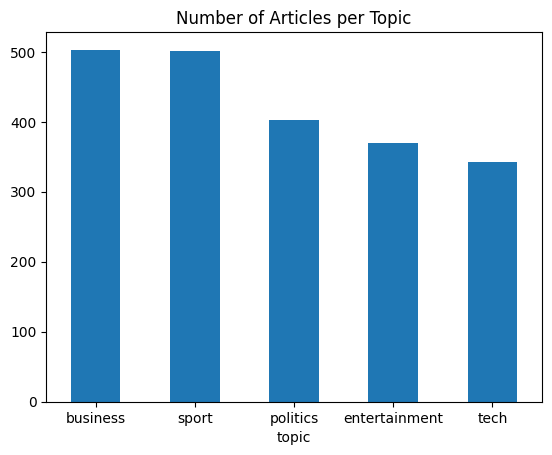

In [13]:
articles_per_topic = data_cleaned['topic'].value_counts()

articles_per_topic.plot.bar(ylim=0, title='Number of Articles per Topic', rot=0)  


# In số liệu phân phối các chủ đề
print("Phân phối các chủ đề:")
print(articles_per_topic)

Here, we see that the number of articles per topic is roughly balanced, which is helpful! If our dataset were imbalanced, we would need to carefully configure our model or artificially balance the dataset

To further analyze our dataset, we need to transform each article's text to a feature vector, a list of numerical values representing some of the text’s characteristics. This is because most ML models cannot process raw text, instead only dealing with numerical values.

Specifically, for each term in our dataset, we will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf. This statistic represents words’ importance in each document. We use a word's frequency as a proxy for its importance. 

We also use the document frequency (the number of documents containing a given word) as a measure of how common the word is. This minimizes the effect of stop-words such as pronouns, or domain-specific language that does not add much information.

We will use sklearn (also known as scikit-learn), a machine learning library that is particularly accessible to beginners. We use the TfidfVectorizer class to calculate a tf-idf vector for each of our documents:

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data_cleaned['text']).toarray()
labels = data_cleaned.topic_id
print(features.shape) 

(2119, 12832)


Each of our 2119 documents is now represented by 12832 features, representing the tf-idf score for different unigrams and bigrams.

This representation is not only useful for solving our classification task, but also to familiarize ourselves with the dataset. For example, we can use the chi-squared test to find the terms are the most correlated with each of the topics.

In [15]:
from sklearn.feature_selection import chi2
import numpy as np

N = 3
for topic, topic_id in sorted(topic_to_id.items()):
  features_chi2 = chi2(features, labels == topic_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(topic))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'business':
  . Most correlated unigrams:
       . oil
       . growth
       . bank
  . Most correlated bigrams:
       . economic growth
       . stock market
       . analysts say
# 'entertainment':
  . Most correlated unigrams:
       . star
       . award
       . film
  . Most correlated bigrams:
       . film festival
       . win best
       . box office
# 'politics':
  . Most correlated unigrams:
       . blair
       . election
       . labour
  . Most correlated bigrams:
       . general election
       . tony blair
       . mr blair
# 'sport':
  . Most correlated unigrams:
       . coach
       . cup
       . match
  . Most correlated bigrams:
       . champion league
       . australian open
       . grand slam
# 'tech':
  . Most correlated unigrams:
       . technology
       . software
       . users
  . Most correlated bigrams:
       . people use
       . let people
       . mobile phone


These result are consistent with what we would expect from a news outlet. We also notice that the addition of bigrams is welcome since it catches pairs of words that only make sense when put together (economic growth, box office, ...). Simply using this correlation factor to predict which class is the most likely might already get us quite far, but we will see that there are simpler and more efficient ways to do this.



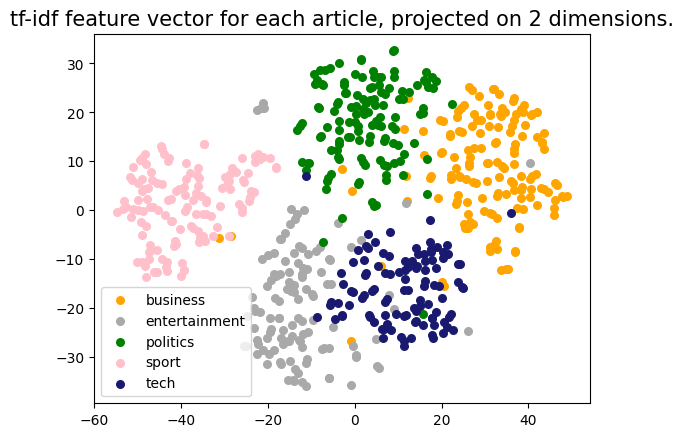

(635, 2)
(2119, 12832)


In [16]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)

# Adjusted random_state to 42
projected_features = TSNE(n_components=2, random_state=42).fit_transform(features[indices])

colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']
for topic, topic_id in sorted(topic_to_id.items()):
    points = projected_features[(labels[indices] == topic_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[topic_id], label=topic)

plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()
plt.show()

print(projected_features.shape)
print(features.shape)


In [17]:
data_cleaned[data_cleaned.text.str.contains('robinson')]

,text,topic,topic_id
50,ogara revel ireland victory ireland fly-half r...,sport,0
59,wales critical clumsy grewcock wales coach mik...,sport,0
243,howard rebut asylum criticisms tory leader mic...,politics,1
257,dawson win england squad recall wasps scrum-ha...,sport,0
274,henson stake early lions claim nations glitter...,sport,0
325,robinson answer critics england captain jason ...,sport,0
368,stevens name england line-up england name bath...,sport,0
373,vickery nations england tight-head prop phil v...,sport,0
387,fume robinson blast officials england coach an...,sport,0
451,ahold suppliers face charge prosecutors charge...,business,3


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(random_state=42),
    MultinomialNB(),
    LogisticRegression(random_state=42),
    SVC(kernel='linear', random_state=42)
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\nthuy\AppData\Local\Temp\ipykernel_15164\1555350305.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='model_name', y='accuracy', data=cv_df,


<Axes: xlabel='model_name', ylabel='accuracy'>

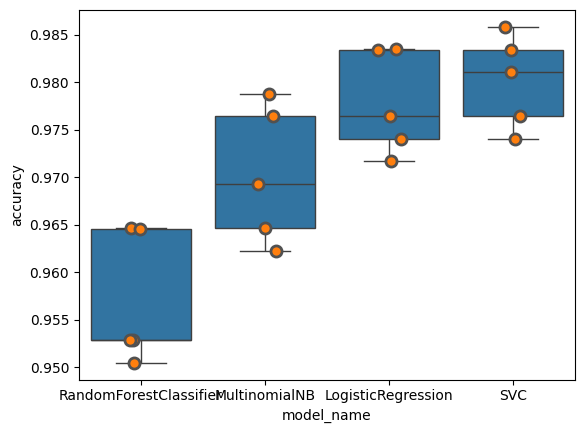

In [19]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [20]:
print(cv_df.groupby('model_name').accuracy.mean())

model_name
LogisticRegression        0.977822
MultinomialNB             0.970273
RandomForestClassifier    0.957059
SVC                       0.980181
Name: accuracy, dtype: float64
